In [ ]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('./data/titanic3.csv')
df.replace('?', np.nan, inplace=True)
df = df.astype({"age": np.float64, "fare": np.float64})

In [19]:
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  


In [20]:
print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


<AxesSubplot: xlabel='survived', ylabel='fare'>

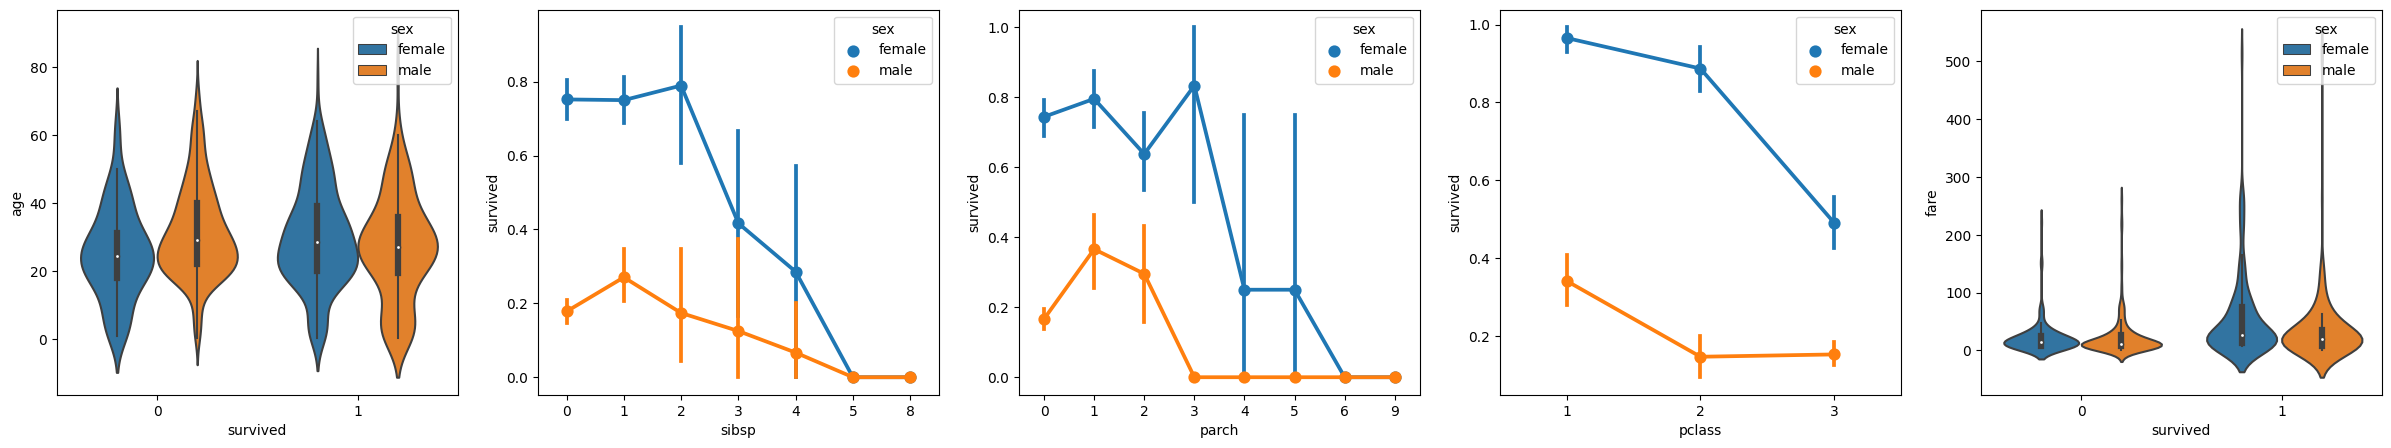

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=df, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=df, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=df, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=df, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=df, ax=axs[4])

In [23]:
df.replace({'male': 1, 'female': 0}, inplace=True)

In [24]:
df.corr().abs()[["survived"]]

C:\Users\Kouristoll\AppData\Local\Temp\ipykernel_1800\2393992178.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [25]:
df['relatives'] = df.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
df.corr().abs()[["survived"]]

C:\Users\Kouristoll\AppData\Local\Temp\ipykernel_1800\317540768.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [27]:
df = df[['sex', 'pclass','age','relatives','fare','survived']].dropna()

> Note: Although age had a low direct correlation, it was kept because it seems reasonable that it might still have correlation in conjunction with other inputs.

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['sex','pclass','age','relatives','fare']], df.survived, test_size=0.2, random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [33]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [36]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [37]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 998us/step - loss: 0.6922 - accuracy: 0.5861
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5945
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.6711
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.7440
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.7584
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5806 - accuracy: 0.7656
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.7703
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.7703
Epoch 11/50
27/27

In [40]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 1ms/step
0.6124401913875598
